In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("crop_yield.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19703 entries, 0 to 19702
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19699 non-null  object 
 1   Crop_Year        19695 non-null  float64
 2   Season           19696 non-null  object 
 3   State            19695 non-null  object 
 4   Area             19696 non-null  float64
 5   Production       19678 non-null  float64
 6   Annual_Rainfall  19674 non-null  float64
 7   Fertilizer       19671 non-null  float64
 8   Pesticide        19696 non-null  float64
 9   Yield            19703 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.5+ MB


In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997.0,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,NaN,NaN,Kharif,NaN,NaN,NaN,2051.4,NaN,NaN,0.710435
2,Castor seed,19997.0,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997.0,Whole Year,Assam,19656.0,126905000.0,NaN,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997.0,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [ ]:
#number of invalid years
count=0
r,c=df.shape
for year in df['Crop_Year']:
    if year > 2024:
        count=count+1
print(count , "rows have invalid years out of", r)


17 rows have invalid years out of 19703


In [ ]:
#removing invaid years
df = df[df.Crop_Year <= 2024]
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997.0,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
3,Coconut,1997.0,Whole Year,Assam,19656.0,126905000.0,NaN,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997.0,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997.0,Whole Year,Assam,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997.0,Rabi,Assam,2979.0,1507.0,2051.4,283511.43,923.49,0.465455
...,...,...,...,...,...,...,...,...,...,...
19697,Small millets,1998.0,Kharif,Nagaland,4000.0,2000.0,1498.0,395200.00,1160.00,0.500000
19698,Wheat,1998.0,Rabi,Nagaland,1000.0,3000.0,1498.0,98800.00,290.00,3.000000
19699,Maize,1997.0,Kharif,Jammu and Kashmir,310883.0,440900.0,1356.2,29586735.11,96373.73,1.285000
19700,Rapeseed &Mustard,2004.0,Rabi,Karnataka,5855.0,1627.0,1117.7,634330.70,1229.55,0.216316


In [ ]:
#checking if null values exist
df.isnull().sum()

Crop                0
Crop_Year           0
Season              1
State               1
Area                1
Production         18
Annual_Rainfall    22
Fertilizer         24
Pesticide           1
Yield               0
dtype: int64

In [ ]:
#removing rows that have more than (columns-1) features as null
df=df.dropna(thresh=8,axis=0)
print(df.shape)

(19677, 10)


In [ ]:
#replacing NaN values
production_mean=df['Production'].mean(skipna=True) #calculate mean of annual rainfall to substitute in NaN rows annual rainfall column
df['Production'].fillna(production_mean)

fertilizer_mean=df['Fertilizer'].mean(skipna=True) #calculate mean of annual rainfall to substitute in NaN rows annual rainfall column
df['Fertilizer'].fillna(fertilizer_mean)

df=df.fillna(method='bfill') #filling empty rainfall cells with rainfall entry in the cell above
df


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997.0,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
3,Coconut,1997.0,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997.0,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997.0,Whole Year,Assam,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997.0,Rabi,Assam,2979.0,1507.0,2051.4,283511.43,923.49,0.465455
...,...,...,...,...,...,...,...,...,...,...
19697,Small millets,1998.0,Kharif,Nagaland,4000.0,2000.0,1498.0,395200.00,1160.00,0.500000
19698,Wheat,1998.0,Rabi,Nagaland,1000.0,3000.0,1498.0,98800.00,290.00,3.000000
19699,Maize,1997.0,Kharif,Jammu and Kashmir,310883.0,440900.0,1356.2,29586735.11,96373.73,1.285000
19700,Rapeseed &Mustard,2004.0,Rabi,Karnataka,5855.0,1627.0,1117.7,634330.70,1229.55,0.216316


In [ ]:
#removing repeated rows
df=df.drop_duplicates()
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997.0,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
3,Coconut,1997.0,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997.0,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997.0,Whole Year,Assam,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997.0,Rabi,Assam,2979.0,1507.0,2051.4,283511.43,923.49,0.465455
...,...,...,...,...,...,...,...,...,...,...
19696,Rice,1998.0,Kharif,Nagaland,141000.0,205000.0,1498.0,13930800.00,40890.00,1.441429
19697,Small millets,1998.0,Kharif,Nagaland,4000.0,2000.0,1498.0,395200.00,1160.00,0.500000
19698,Wheat,1998.0,Rabi,Nagaland,1000.0,3000.0,1498.0,98800.00,290.00,3.000000
19699,Maize,1997.0,Kharif,Jammu and Kashmir,310883.0,440900.0,1356.2,29586735.11,96373.73,1.285000


In [ ]:
df.describe(include='object')

,Crop,Season,State
count,19662,19662,19662
unique,55,6,30
top,Rice,Kharif,Karnataka
freq,1194,8224,1432


In [ ]:
df_crop1=df[df['Yield']>0]
df_crop2=df_crop1.groupby('Crop').sum()
df_crop2

,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,,,
Arecanut,321347.0,Whole Year Whole Year Whole Year Whole Year Wh...,AssamKarnatakaKeralaMeghalayaWest BengalPuduch...,8.765158e+06,3.914426e+07,3.414578e+05,1.226556e+09,2.449481e+06,3.359289e+02
Arhar/Tur,1016535.0,Kharif Kharif Whole Year Kharif Kh...,KarnatakaMeghalayaWest BengalAssamKarnatakaMeg...,8.234615e+07,6.071758e+07,7.052605e+05,1.120951e+10,2.280486e+07,4.899122e+02
Bajra,1052589.0,Kharif Summer Kharif Kharif Kh...,KarnatakaKarnatakaWest BengalPuducherryKarnata...,9.335810e+07,1.176396e+08,5.566748e+05,1.203343e+10,2.465983e+07,1.271990e+03
Banana,488061.0,Whole Year Whole Year Whole Year Whole Year Wh...,MeghalayaAssamGoaKeralaMeghalayaAssamGoaKerala...,7.127321e+06,2.264720e+08,4.199956e+05,9.805713e+08,1.916819e+06,6.578526e+03
Barley,596557.0,Whole Year Rabi Rabi Rabi Ra...,West BengalWest BengalWest BengalWest BengalWe...,9.270084e+06,1.949869e+07,3.474722e+05,1.190739e+09,2.472432e+06,4.738754e+02
Black pepper,253163.0,Kharif Whole Year Kharif Whole Year Wh...,KarnatakaKeralaPuducherryGoaKarnatakaKeralaGoa...,4.362226e+06,2.095650e+06,2.700002e+05,5.699445e+08,1.150606e+06,1.045302e+02
Cardamom,146569.0,Whole Year Whole Year Whole Year Whole Year Wh...,KarnatakaKarnatakaKeralaWest BengalKeralaWest ...,1.305532e+06,2.554900e+05,1.241488e+05,1.751955e+08,3.433323e+05,1.245829e+01
Cashewnut,265313.0,Whole Year Whole Year Whole Year Whole Year Wh...,KeralaGoaKeralaGoaKeralaPuducherryAndhra Prade...,7.472794e+06,3.737207e+06,2.581485e+05,1.005401e+09,2.003926e+06,4.181387e+02
Castor seed,600684.0,Rabi Whole Year Kharif Kharif Ra...,MeghalayaWest BengalAssamKarnatakaWest BengalA...,1.659552e+07,2.404919e+07,4.123748e+05,2.248113e+09,4.560420e+06,2.078445e+02


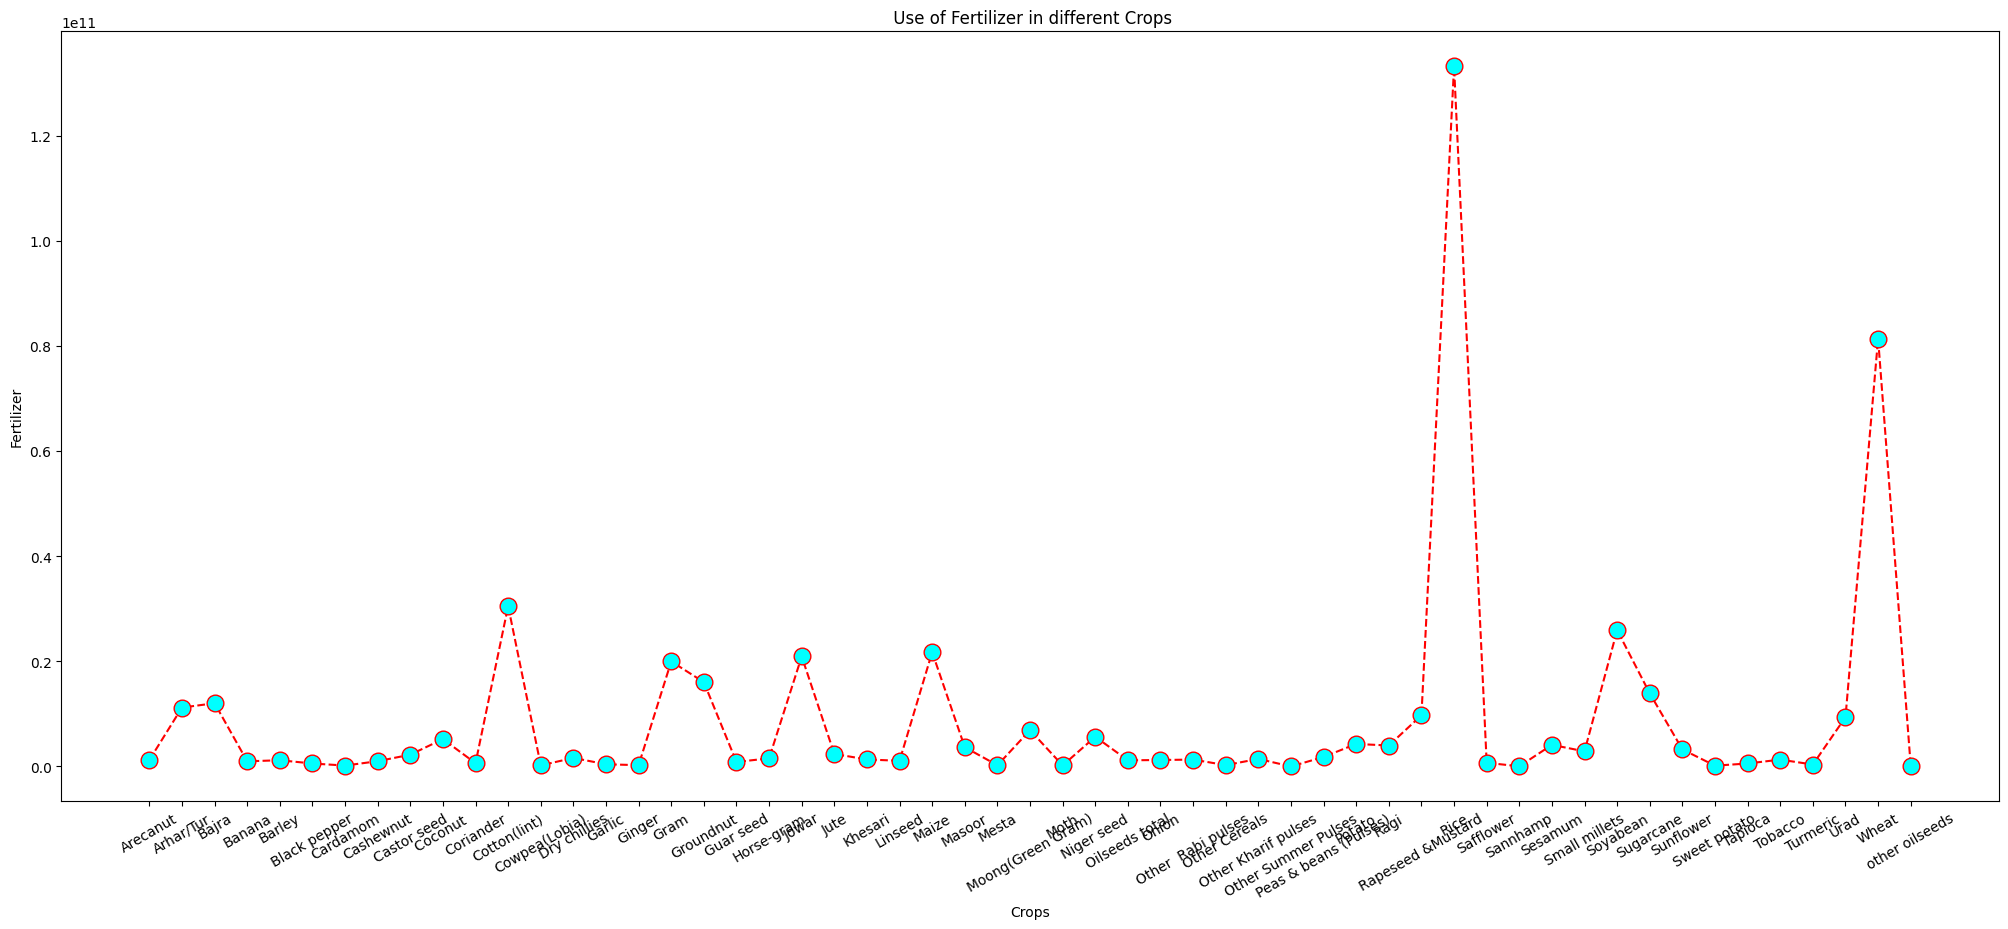

In [ ]:
#crop vs fertilizer plot
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize = (25,10))
plt.plot(df_crop2.index, df_crop2['Fertilizer'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()
#rice has most fertilizer consumption

In [ ]:
#state vs yield
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

,Crop,Crop_Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,,,
West Bengal,ArecanutArhar/TurBajraBarleyCardamomCastor see...,2194843.0,Whole Year Whole Year Kharif Whole Year Wh...,2.376822e+08,8.941377e+09,1.881516e+06,2.970973e+10,6.612665e+07,291985.882179
Puducherry,ArecanutBajraBlack pepperCorianderCotton(lint)...,1346899.0,Kharif Kharif Kharif Kharif Su...,6.535410e+05,4.938156e+08,9.599160e+05,8.480457e+07,1.705159e+05,232163.600840
Andhra Pradesh,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,2543550.0,Whole Year Kharif Rabi Kharif Ra...,2.389253e+08,2.607622e+10,1.160140e+06,3.125934e+10,6.210724e+07,229735.184723
Tamil Nadu,ArecanutArhar/TurBajraBananaCashewnutCastor se...,1645993.0,Whole Year Kharif Kharif Whole Year Wh...,1.102530e+08,7.805137e+10,7.624801e+05,1.471246e+10,2.952767e+07,185806.693239
Assam,ArecanutCoconut Cotton(lint)Dry chilliesGramJu...,1460150.0,Whole Year Whole Year Kharif Whole Year Ra...,7.715010e+07,3.637510e+09,1.523288e+06,1.030594e+10,2.087579e+07,160610.177795
Karnataka,ArecanutArhar/TurBajraBajraBlack pepperCardamo...,2876568.0,Whole Year Kharif Kharif Summer Kh...,2.579074e+08,6.377278e+10,1.692393e+06,3.458024e+10,6.917312e+07,151391.867808
Kerala,ArecanutBlack pepperCashewnutCoconut TapiocaAr...,1070881.0,Whole Year Whole Year Whole Year Whole Year Wh...,3.634377e+07,1.297005e+11,1.533606e+06,4.740398e+09,9.631989e+06,147707.653263
Goa,ArecanutBananaBlack pepperCashewnutCoconut Gro...,494067.0,Whole Year Whole Year Whole Year Whole Year Wh...,2.749600e+06,2.193998e+09,8.247461e+05,3.581078e+08,7.506114e+05,87275.955000
Telangana,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,800319.0,Kharif Rabi Kharif Rabi Wh...,3.979214e+07,1.475091e+08,3.955095e+05,6.262644e+09,1.356572e+07,39508.727733


In [ ]:
#state vs yield
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)

df_state['Region'] = ['States' for i in range(len(df_state))]
# fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
# fig.show()
fig = px.bar(df_state, y = 'Yield', color=df_state.index, hover_data=['Yield'],text = 'Yield')
fig.show()

In [ ]:
#state vs yield
df_crop = df.groupby('Crop').sum()
df_crop.sort_values(by = 'Yield', inplace=True, ascending = False)
df_crop

,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,,,
Coconut,345521.0,Whole Year Whole Year Whole Year Whole Year Wh...,AssamKeralaWest BengalAssamGoaKarnatakaKeralaW...,3.845346e+07,3.087520e+11,3.084375e+05,5.206574e+09,1.039215e+07,1.488144e+06
Sugarcane,1215012.0,Kharif Whole Year Whole Year Whole Year Kh...,AssamKarnatakaMeghalayaWest BengalPuducherryAs...,1.027778e+08,7.236537e+09,9.438568e+05,1.390494e+10,2.793033e+07,3.129510e+04
Potato,1262000.0,Whole Year Whole Year Whole Year Whole Year Kh...,AssamMeghalayaWest BengalAssamKarnatakaKarnata...,3.140623e+07,6.296880e+08,9.331290e+05,4.290023e+09,8.600714e+06,8.372319e+03
Banana,492066.0,Whole Year Whole Year Whole Year Whole Year Wh...,MeghalayaAssamGoaKeralaMeghalayaAssamGoaKerala...,7.127527e+06,2.264720e+08,4.209418e+05,9.805911e+08,1.916870e+06,6.578526e+03
Onion,910383.0,Whole Year Kharif Whole Year Kharif Ra...,AssamPuducherryAssamKarnatakaKarnatakaKarnatak...,8.865135e+06,1.216743e+08,5.526916e+05,1.233369e+09,2.458153e+06,6.001545e+03
Tapioca,401873.0,Whole Year Whole Year Kharif Whole Year Wh...,AssamKeralaPuducherryAssamKeralaMeghalayaAssam...,4.340522e+06,1.308636e+08,3.830037e+05,5.689887e+08,1.132229e+06,3.343590e+03
Maize,1954782.0,Kharif Kharif Rabi Summer Kh...,AssamKarnatakaKarnatakaKarnatakaMeghalayaWest ...,1.577922e+08,4.107781e+08,1.370346e+06,2.176985e+10,4.343944e+07,3.337837e+03
Rice,2398593.0,Autumn Winter Kharif Rabi Su...,AssamAssamKarnatakaKarnatakaKarnatakaMeghalaya...,9.915105e+08,2.228729e+09,1.990993e+06,1.331767e+11,2.677622e+08,2.650187e+03
Sweet potato,548521.0,Whole Year Whole Year Whole Year Whole Year Wh...,AssamMeghalayaAssamKeralaMeghalayaAssamKeralaM...,1.190929e+06,1.040954e+07,4.370614e+05,1.548165e+08,3.168080e+05,2.522735e+03


In [ ]:
# df_crop['Crop'] = ['Crops' for i in range(len(df_crop))]

# fig = px.bar(df_crop, x='Crop', y = 'Yield', color=df_crop.index, hover_data=['Yield'])
# fig.show()
fig = px.bar(df_crop, y = 'Yield', color=df_crop.index, hover_data=['Yield'],text = 'Yield')
fig.show()

In [ ]:
#converting string type column to int by using label encoding
from sklearn.preprocessing import LabelEncoder
#create different objects for each column that is to be label encoded
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
df['Crop']=le1.fit_transform(df['Crop'])
df['Season']=le2.fit_transform(df['Season'])
df['State']=le3.fit_transform(df['State'])
df

<ipython-input-46-05ebdc976087>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-05ebdc976087>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-05ebdc976087>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997.0,4,2,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
3,9,1997.0,4,2,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,11,1997.0,1,2,1739.0,794.0,2051.4,165500.63,539.09,0.420909
5,13,1997.0,4,2,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636
6,16,1997.0,2,2,2979.0,1507.0,2051.4,283511.43,923.49,0.465455
...,...,...,...,...,...,...,...,...,...,...
19696,40,1998.0,1,19,141000.0,205000.0,1498.0,13930800.00,40890.00,1.441429
19697,44,1998.0,1,19,4000.0,2000.0,1498.0,395200.00,1160.00,0.500000
19698,53,1998.0,2,19,1000.0,3000.0,1498.0,98800.00,290.00,3.000000
19699,24,1997.0,1,10,310883.0,440900.0,1356.2,29586735.11,96373.73,1.285000


In [ ]:
print(df.shape)
df.isnull().sum()

(19662, 10)


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
df.describe(include='all')

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19662.000000,19662.000000,19662.000000,19662.000000,1.966200e+04,1.966200e+04,19662.000000,1.966200e+04,1.966200e+04,19662.000000
mean,29.359933,2009.130302,2.037229,14.327688,1.801020e+05,1.645907e+07,1437.412449,2.414365e+07,4.889416e+04,80.061517
std,15.562069,6.496145,1.222526,8.999284,7.333122e+05,2.632367e+08,816.958038,9.501068e+07,2.134288e+05,878.904264
min,0.000000,1997.000000,0.000000,0.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,17.000000,2004.000000,1.000000,7.000000,1.390000e+03,1.390000e+03,940.700000,1.879955e+05,3.566525e+02,0.600000
50%,31.000000,2010.000000,2.000000,14.000000,9.316500e+03,1.380150e+04,1247.000000,1.237424e+06,2.420310e+03,1.030774
75%,43.000000,2015.000000,3.000000,22.000000,7.510300e+04,1.227525e+05,1643.700000,1.003481e+07,2.002283e+04,2.389783
max,54.000000,2020.000000,5.000000,29.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
#splitting columns into x and result as y
df=df.reset_index()
y=df['Yield']
x=df.drop('Yield', axis=1)

In [ ]:
#split into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#ML ALGORITHMS

In [ ]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn import metrics
#metrics consists functions for calculating mean_erros,r^2_errors etc
dt=DecisionTreeRegressor(criterion='squared_error',max_depth=8,min_samples_split=10,random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
train_score=dt.score(x_train,y_train)
test_score=dt.score(x_test,y_test)
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_pred))
print("root mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("train score: ",train_score)
print("test score: ",test_score)



Mean absolute error:  7.885557105962199
root mean squared error:  92.36191517722625
train score:  0.9950863065267068
test score:  0.9894199256567109


In [ ]:
#SVM Regressor
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_pred_train_svr= svr.predict(x_train)
y_pred_test_svr = svr.predict(x_test)

print("Training Accuracy : ",metrics.r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",metrics.r2_score(y_test, y_pred_test_svr))

Training Accuracy :  -0.0004810525981453484
Test Accuracy :  -0.0009481224577077008


Mean absolute error:  7.3717521719595
root mean squared error:  101.5904157790914
train score:  0.9909915868805508
test score:  0.9872000481620723


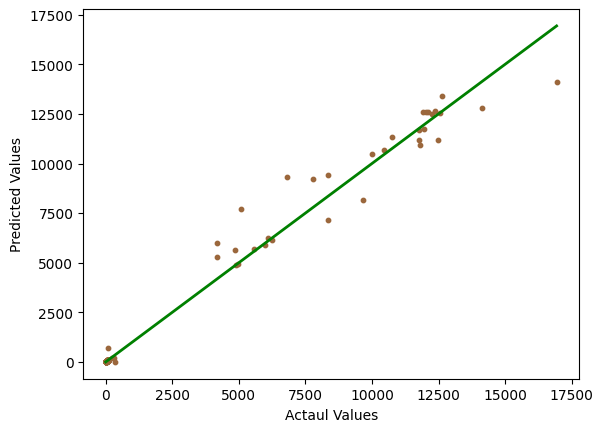

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error', random_state=42)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
train_score=forest.score(x_train,y_train)
test_score=forest.score(x_test,y_test)
print("Mean absolute error: ", metrics.mean_absolute_error(y_test,y_pred))
print("root mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("train score: ",train_score)
print("test score: ",test_score)
plt.scatter(y_test,y_pred,s=10,color='#9B673C')
plt.xlabel('Actaul Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',linewidth=2)
plt.show()


mean absolute error:  12.56571340290899
root mean square error:  3.544815002635397
train score:  0.9947521039380619
test score:  0.9786894584626662


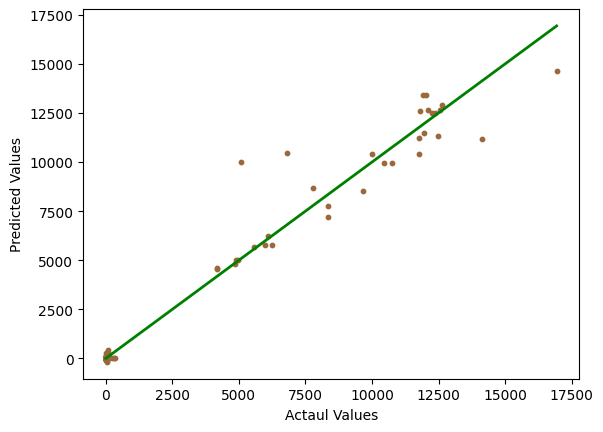

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
train_score=gb.score(x_train,y_train)
test_score=gb.score(x_test,y_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_absolute_error(y_test,y_pred))
print("mean absolute error: ", mae)
print("root mean square error: ",rmse)
print("train score: ",train_score)
print("test score: ",test_score)
plt.scatter(y_test,y_pred,s=10,color='#9B673C')
plt.xlabel('Actaul Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',linewidth=2)
plt.show()

mean absolute error:  141.82411609924586
root mean square error:  11.908993076631033
train score:  0.34155094275859965
test score:  0.33010536112142475


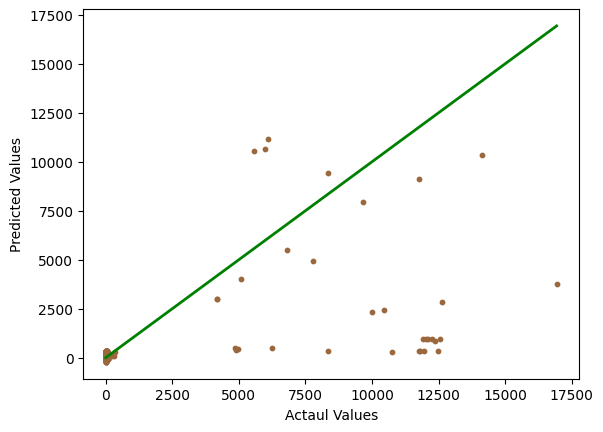

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
train_score=linear.score(x_train,y_train)
test_score=linear.score(x_test,y_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_absolute_error(y_test,y_pred))
print("mean absolute error: ", mae)
print("root mean square error: ",rmse)
print("train score: ",train_score)
print("test score: ",test_score)
plt.scatter(y_test,y_pred,s=10,color='#9B673C')
plt.xlabel('Actaul Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',linewidth=2)
plt.show()

In [ ]:
#k-fold validation for Decision Tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
fold_scores=[]
dt=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=10,random_state=42)
print("K-Fold validation on Decision Tree ")
for train_index, test_index in kf.split(x):
  x_train,x_test=x.loc[train_index],x.loc[test_index]
  y_train,y_test=y[train_index],y[test_index]
  dt.fit(x_train,y_train)
  score=dt.score(x_test,y_test)
  fold_scores.append(score)

i=1
for fold in fold_scores:
  print("fold",i)
  print(fold)
  i=i+1

mean_score=np.mean(fold_scores)
print(" ")
print("mean score")
print(mean_score)


K-Fold validation on Decision Tree 
fold 1
0.9582437282164932
fold 2
0.9877084191390149
fold 3
0.7606625550234026
fold 4
0.9686386705205299
fold 5
0.8500340220618406
fold 6
0.9720186945218228
fold 7
0.8932188767199122
fold 8
0.9652903367594926
fold 9
0.9562269153804106
fold 10
0.9925593720988285
 
mean score
0.9304601590441747


In [ ]:
#k-fold validation for Random Forest Regressor
k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
fold_scores=[]
rf=RandomForestRegressor(n_estimators=100,criterion='squared_error', random_state=42)
for train_index, test_index in kf.split(x):
  x_train,x_test=x.loc[train_index],x.loc[test_index]
  y_train,y_test=y[train_index],y[test_index]
  rf.fit(x_train,y_train)
  score=rf.score(x_test,y_test)
  fold_scores.append(score)

i=1
for fold in fold_scores:
  print("fold",i)
  print(fold)
  i=i+1

mean_score=np.mean(fold_scores)
print(" ")
print("mean score")
print(mean_score)

fold 1
0.9901435316683738
fold 2
0.9884152518479278
fold 3
0.9366169627952485
fold 4
0.9796754103073398
fold 5
0.8424462720865975
fold 6
0.9771553792448657
fold 7
0.9708904252052777
fold 8
0.9018996898578009
fold 9
0.9939554152403122
fold 10
0.996123589670833
 
mean score
0.9577321927924578


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
fold_scores=[]
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
for train_index, test_index in kf.split(x):
  x_train,x_test=x.loc[train_index],x.loc[test_index]
  y_train,y_test=y[train_index],y[test_index]
  gb.fit(x_train,y_train)
  score=gb.score(x_test,y_test)
  fold_scores.append(score)

i=1
for fold in fold_scores:
  print("fold",i)
  print(fold)
  i=i+1

mean_score=np.mean(fold_scores)
print(" ")
print("mean score")
print(mean_score)



fold 1
0.9818150179230285
fold 2
0.9835992413242174
fold 3
0.9945641297485524
fold 4
0.9736642391809883
fold 5
0.8923569723001885
fold 6
0.9539092427141718
fold 7
0.9307224610536845
fold 8
0.9492358362901687
fold 9
0.9906976290951338
fold 10
0.9903843772426
 
mean score
0.9640949146872735


In [ ]:
#kfold for linear regression
k=10
kf=KFold(n_splits=k,shuffle=True,random_state=42)
fold_scores=[]
lr=LinearRegression()
for train_index, test_index in kf.split(x):
  x_train,x_test=x.loc[train_index],x.loc[test_index]
  y_train,y_test=y[train_index],y[test_index]
  lr.fit(x_train,y_train)
  score=lr.score(x_test,y_test)
  fold_scores.append(score)

i=1
for fold in fold_scores:
  print("fold",i)
  print(fold)
  i=i+1

mean_score=np.mean(fold_scores)
print(" ")
print("mean score")
print(mean_score)